# Analysis

## Environment Preparation

In [1]:
# import libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from datetime import datetime
import data_prep

## Preprocessing

In [2]:
# List all data files which should be preprocessed
data_files = ['data_clara.csv', 'data_nora.csv']

In [13]:
# Call preprocessing function and store data in one data df
data = data_prep.prepare_data(data_files)

In [20]:
# Create trial index per participant 
data['index_corr'] = data.groupby('participant').cumcount() + 1

## Data Cleaning

In [21]:
# Detele practice trials and create practice subset
practice_trials = data[data['block'] == 'Test']
data = data[data['block'] != 'Test']

## Summary Stats

Trials without practice trials, check counterbalancing

In [26]:
# Identifier condition
data.groupby(['participant','identifier_chooser_owner_value_corr']).describe()

session                      \
                                                  count mean  std  min  25%   
participant identifier_chooser_owner_value_corr                               
266736      cozmo_cozmo_lose                       50.0  1.0  0.0  1.0  1.0   
            cozmo_cozmo_win                        46.0  1.0  0.0  1.0  1.0   
            cozmo_you_lose                         46.0  1.0  0.0  1.0  1.0   
            cozmo_you_win                          50.0  1.0  0.0  1.0  1.0   
            you_cozmo_lose                         51.0  1.0  0.0  1.0  1.0   
            you_cozmo_win                          45.0  1.0  0.0  1.0  1.0   
            you_you_lose                           47.0  1.0  0.0  1.0  1.0   
            you_you_win                            49.0  1.0  0.0  1.0  1.0   
852838      cozmo_cozmo_lose                       50.0  1.0  0.0  1.0  1.0   
            cozmo_cozmo_win                        46.0  1.0  0.0  1.0  1.0   
            cozmo_you_lose                         46.0  1.0  0.0  1.0  1.0   
            cozmo_you_win                          50.0  1.0  0.0  1.0  1.0   
            you_cozmo_lose                         51.0  1.0  0.0  1.0  1.0   
            you_cozmo_win                          45.0  1.0  0.0  1.0  1.0   
            you_you_lose                           47.0  1.0  0.0  1.0  1.0   
            you_you_win                            49.0  1.0  0.0  1.0  1.0   

                                                               trial  \
                                                 50%  75%  max count   
participant identifier_chooser_owner_value_corr                        
266736      cozmo_cozmo_lose                     1.0  1.0  1.0  50.0   
            cozmo_cozmo_win                      1.0  1.0  1.0  46.0   
            cozmo_you_lose                       1.0  1.0  1.0  46.0   
            cozmo_you_win                        1.0  1.0  1.0  50.0   
            you_cozmo_lose                       1.0  1.0  1.0  51.0   
            you_cozmo_win                        1.0  1.0  1.0  45.0   
            you_you_lose                         1.0  1.0  1.0  47.0   
            you_you_win                          1.0  1.0  1.0  49.0   
852838      cozmo_cozmo_lose                     1.0  1.0  1.0  50.0   
            cozmo_cozmo_win                      1.0  1.0  1.0  46.0   
            cozmo_you_lose                       1.0  1.0  1.0  46.0   
            cozmo_you_win                        1.0  1.0  1.0  50.0   
            you_cozmo_lose                       1.0  1.0  1.0  51.0   
            you_cozmo_win                        1.0  1.0  1.0  45.0   
            you_you_lose                         1.0  1.0  1.0  47.0   
            you_you_win                          1.0  1.0  1.0  49.0   

                                                            ...  \
                                                      mean  ...   
participant identifier_chooser_owner_value_corr             ...   
266736      cozmo_cozmo_lose                      7.260000  ...   
            cozmo_cozmo_win                       5.673913  ...   
            cozmo_you_lose                       11.239130  ...   
            cozmo_you_win                         9.820000  ...   
            you_cozmo_lose                       23.254902  ...   
            you_cozmo_win                        21.644444  ...   
            you_you_lose                         27.340426  ...   
            you_you_win                          25.693878  ...   
852838      cozmo_cozmo_lose                      7.260000  ...   
            cozmo_cozmo_win                       5.673913  ...   
            cozmo_you_lose                       11.239130  ...   
            cozmo_you_win                         9.820000  ...   
            you_cozmo_lose                       23.254902  ...   
            you_cozmo_win                        21.644444  ...   
            you_you_lose              

In [27]:
# Chooser
data.groupby(['participant','left_color']).describe()

session                                     \
                                   count mean  std  min  25%  50%  75%  max   
participant left_color                                                        
266736      images/stim10_5.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim11_6.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim12_6.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim13_7.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim14_7.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim15_8.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim16_8.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim17_9.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim18_9.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim19_10.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim1_1.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim20_10.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim21_11.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim22_11.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim23_12.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim24_12.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim2_1.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim3_2.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim4_2.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim5_3.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim6_3.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim7_4.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim8_4.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim9_5.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
852838      images/stim10_5.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim11_6.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim12_6.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim13_7.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim14_7.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim15_8.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim16_8.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim17_9.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim18_9.jpg     16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim19_10.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim1_1.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim20_10.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim21_11.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim22_11.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim23_12.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim24_12.jpg    16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim2_1.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim3_2.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim4_2.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim5_3.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim6_3.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim7_4.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim8_4.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            images/stim9_5.jpg      16.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

   

In [28]:
# Chooser
data.groupby(['participant','choice_location']).describe()

session                                     trial  \
                              count mean  std  min  25%  50%  75%  max  count   
participant choice_location                                                     
266736      left              194.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  194.0   
            right             190.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  190.0   
852838      left              194.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  194.0   
            right             190.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  190.0   

                                        ... owner_confirm_rt          \
                                  mean  ...              75%     max   
participant choice_location             ...                            
266736      left             18.149485  ...         0.530225  0.9621   
            right            14.815789  ...         0.542300  0.9657   
852838      left             18.453608  ...         0.646500  0.9577   
            right            14.505263  ...         0.645075  0.8910   

                            index_corr                                        \
                                 count        mean         std   min     25%   
participant choice_location                                                    
266736      left                 194.0  206.840206  110.676723  18.0  112.25   
            right                190.0  212.215789  111.546705  19.0  115.50   
852838      left                 194.0  211.103093  112.471480  14.0  115.25   
            right                190.0  199.778947  109.467995  18.0  108.25   

                                                   
                               50%     75%    max  
participant choice_location                        
266736      left             203.5  302.75  400.0  
            right            214.0  313.75  401.0  
852838      left             215.0  307.75  397.0  
            right            194.5  295.75  396.0  

[4 rows x 40 columns]

In [29]:
# Chooser
data.groupby(['participant','value']).describe()

session                                     trial        \
                    count mean  std  min  25%  50%  75%  max  count  mean   
participant value                                                           
266736      lose    192.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  192.0  17.5   
            win     192.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  192.0  15.5   
852838      lose    192.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  192.0  17.5   
            win     192.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  192.0  15.5   

                   ... owner_confirm_rt         index_corr              \
                   ...              75%     max      count        mean   
participant value  ...                                                   
266736      lose   ...         0.542400  0.9657      192.0  210.302083   
            win    ...         0.524125  0.8922      192.0  208.697917   
852838      lose   ...         0.647875  0.9577      192.0  205.302083   
            win    ...         0.642950  0.9509      192.0  205.697917   

                                                                   
                          std   min     25%    50%     75%    max  
participant value                                                  
266736      lose   111.325204  18.0  113.50  210.0  306.25  401.0  
            win    110.950026  20.0  115.25  207.5  303.00  399.0  
852838      lose   111.168343  17.0  110.50  206.5  300.50  397.0  
            win    111.112661  14.0  109.50  205.0  301.50  396.0  

[4 rows x 40 columns]

In [30]:
# Chooser
data.groupby(['participant','value_distribution']).describe()

session                                     \
                                 count mean  std  min  25%  50%  75%  max   
participant value_distribution                                              
266736      10.0                  36.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            90.0                 348.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
852838      10.0                  36.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
            90.0                 348.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   

                                trial             ... owner_confirm_rt  \
                                count       mean  ...              75%   
participant value_distribution                    ...                    
266736      10.0                 36.0  16.750000  ...         0.507725   
            90.0                348.0  16.474138  ...         0.541250   
852838      10.0                 36.0  16.750000  ...         0.689375   
            90.0                348.0  16.474138  ...         0.642550   

                                       index_corr                          \
                                   max      count        mean         std   
participant value_distribution                                              
266736      10.0                0.6749       36.0  210.250000  111.349482   
            90.0                0.9657      348.0  209.422414  111.119311   
852838      10.0                0.8934       36.0  207.611111  113.674040   
            90.0                0.9577      348.0  205.281609  110.879642   

                                                                    
                                 min     25%    50%     75%    max  
participant value_distribution                                      
266736      10.0                29.0  114.25  212.0  303.25  384.0  
            90.0                18.0  113.75  209.5  305.25  401.0  
852838      10.0                27.0  123.25  211.0  302.50  397.0  
            90.0                14.0  109.75  205.5  301.25  396.0  

[4 rows x 32 columns]

## Analysis

In [11]:
# Clean from rows where response was too slow or wrong
data = data[(data['bool_slow_color_choice_or_confirm'] == False) & 
            (data['bool_wrong_color_confirm'] == False) & 
            (data['bool_slow_owner_confirm'] == False) & 
            (data['bool_wrong_owner_confirm'] == False)]

In [83]:
# Store preprocessed data in csv
data.to_csv('/Users/anja/Desktop/data_mt/output_data.csv', index=False)

In [86]:
# Mean age, handedness, gender?

In [88]:
# Normal distribution of reaction time? Any outliers?

<Axes: xlabel='identifier_chooser_owner_value_corr', ylabel='owner_confirm_rt'>

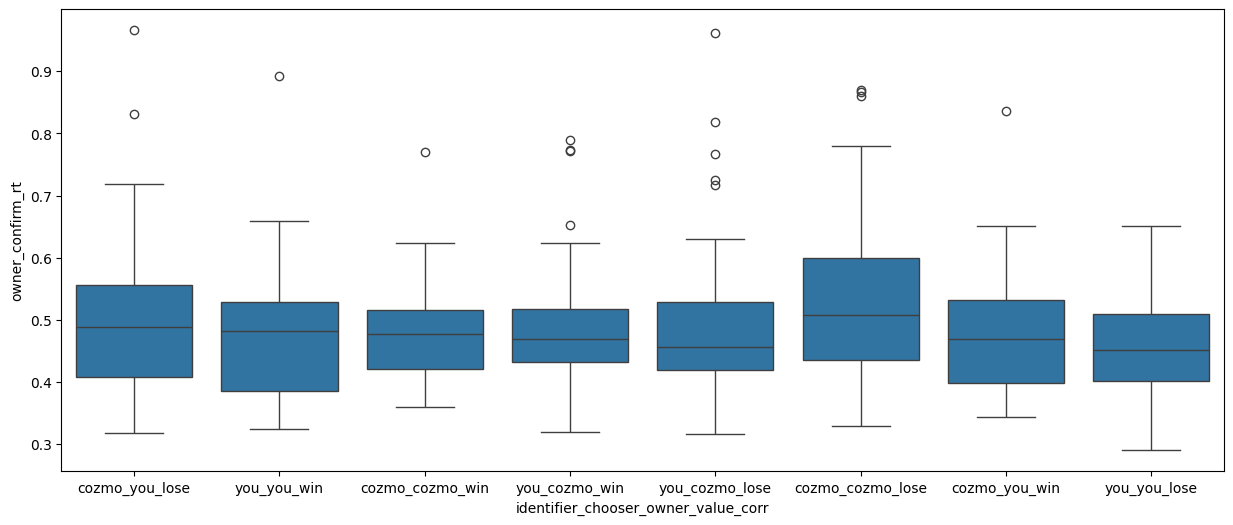

In [89]:
# Reaction time per condition group #TODO:change to violin plot when more data is available https://python-graph-gallery.com/39-hidden-data-under-boxplot/
plt.figure(figsize=(15, 6)) 
sns.boxplot( x=data_df["identifier_chooser_owner_value_corr"], y=data_df["owner_confirm_rt"] )

In [90]:
# how does reaction time develope over time? learing effects? do get people faster? 

In [91]:
# do people prefer one choice? i mean by side? Are they faster by one side? maybe related to handedness?

In [92]:
# Als variable anschauen wie viel gewinn oder Verlust Cozmo schon hatte.
